<a href="https://colab.research.google.com/github/DeepInsider/ArticleResources/blob/master/docs/tensorflow2/tf2_keras_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 Digital Advantage - Deep Insider.

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 「分類問題（全1回）」 ― 連載『TensorFlow 2.0＋Keras（ tf.keras）入門』のノートブック（4）

<table valign="middle">
  <td>
    <a target="_blank" href="https://www.atmarkit.co.jp/ait/subtop/features/di/tf2keras_index.html"> <img src="https://re.deepinsider.jp/img/ml-logo/manabu.svg"/>Deep Insiderで記事を読む</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_classification.ipynb"> <img src="https://re.deepinsider.jp/img/ml-logo/gcolab.svg" />Google Colabで実行する</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/DeepInsider/playground-data/blob/master/docs/articles/tf2_keras_classification.ipynb"> <img src="https://re.deepinsider.jp/img/ml-logo/github.svg" />GitHubでソースコードを見る</a>
  </td>
</table>

※上から順に実行してください。上のコードで実行したものを再利用しているところがあるため、すべて実行しないとエラーになるコードがあります。  
　すべてのコードを一括実行したい場合は、メニューバーから［ランタイム］－［すべてのセルを実行］をクリックしてください。

※「Python 3」を利用してください。  
　Python 3を利用するには、メニューバーから［ランタイム］－［ランタイムのタイプを変更］を選択すると表示される［ノートブックの設定］ダイアログの、［ランタイムのタイプ］欄で「Python 3」に選択し、その右下にある［保存］ボタンをクリックしてください。

# 第8回　分類問題をディープラーニング（基本のDNN）で解こう

## ■本稿の目的と方針

ディープラーニングの基本形である「DNN（ディープニューラルネットワーク」をTensorFlow 2.xで実装する方法を示す。これにより、連載第1回～第3回ですでに身に付けたニューラルネットワーク＆ディープラーニングの知識だけでも、さまざまな機械学習が行えることを確認する。

- 前提知識は、基本的なニューラルネットワークを組めること。具体的には『[TensorFlow 2＋Keras（tf.keras）入門 - ＠IT](https://www.atmarkit.co.jp/ait/subtop/features/di/tf2keras_index.html)』の第1回～第6回の知識レベルが必要
- 今回の課題： 手書き数字（後述）の推論を、第1回～第3回のDNN知識および、第4回～第6回の書き方の知識だけで解決してみよう
- 第1回～第3回は、これまでのSequentialモデルではなく、サブクラスモデル（Subclassing API）で実装する
- 一般的によく使われている活性化関数／損失関数／最適化アルゴリズムを使用する（前回までは基礎的でシンプルなものを使っていた）
- 関連として、第7回で「回帰問題を基本のDNNで解く方法」を解説している

## ■本稿で説明する大まかな流れ

- 【多クラス分類編】
  - （0）本ノートブックを実行するための事前準備
  - （1）データの準備
  - （2）モデルの定義
  - （3）学習／最適化（オプティマイザー）
  - （4）評価／精度検証
  - （5）推論／未知データによるテスト
- [【二値分類編】](#scrollTo=E4mSTkCUodUv&line=1&uniqifier=1)
  - 上記と同様の手順から変更箇所のみ説明

# 【多クラス分類編】----------

## ■（0）本ノートブックを実行するための事前準備

In [0]:
# Google Colabで最新の2.xを使う場合、2.xに切り替える（Colab専用）
%tensorflow_version 2.x

### ●前提条件

### 【チェック】Pythonバージョン（※3系を使うこと）
Colabにインストール済みのものを使う。もし2系になっている場合は、メニューバーの［ランタイム］－［ランタイムのタイプを変更］をクリックして切り替えてほしい。

In [2]:
import sys
print('Python', sys.version)
# Python 3.6.9 (default, Apr 18 2020, 01:56:04)   …… などと表示される

Python 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


### 【チェック】TensorFlowバージョン（※2系を使うこと）
基本的にはColabにインストール済みのものを使う。もし2系になっている場合は、リスト4-0を実行してバージョン2.0を使う。

In [3]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
# TensorFlow 2.2.0 ……などと表示される

TensorFlow 2.2.0


### リスト0-1　［オプション］ライブラリ「TensorFlow」最新バージョンのインストール

In [4]:
# Google Colabで最新の2.xを使う場合（Colab専用）
%tensorflow_version 2.x

# 最新バージョンにアップグレードする場合
!pip install --upgrade tensorflow

# バージョンを明示してアップグレードする場合
#!pip install --upgrade tensorflow===2.1.0

# 最新バージョンをインストールする場合
#!pip install tensorflow

# バージョンを明示してインストールする場合
#!pip install tensorflow===2.1.0

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


### ［オプション］【チェック】TensorFlowバージョン（※インストール後の確認）
バージョン2.xになっているか再度チェックする。

In [5]:
import tensorflow as tf
print('TensorFlow', tf.__version__)
# TensorFlow 2.2.0 ……などと表示される

TensorFlow 2.2.0


## ■（1）データの準備

ファッション商品写真の画像データセットとして「[Fashion-MNIST](https://www.atmarkit.co.jp/ait/articles/2005/28/news016.html)」を使用する。  
![Fashion-MNISTに含まれる画像データセットの例](https://image.itmedia.co.jp/ait/articles/2005/28/l_di-01.gif)

### リスト1-1　Fashion-MNIST（ファッション商品写真）画像データの取得

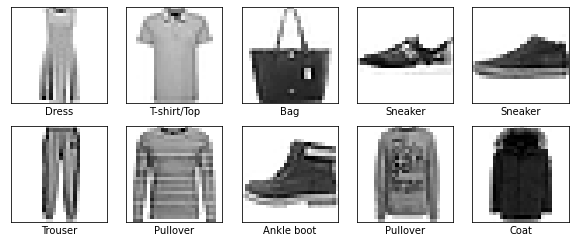

In [68]:
# TensorFlowライブラリのtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
import matplotlib.pyplot as plt  # グラフ描画ライブラリ（データ画像の表示に使用）
import numpy as np               # 数値計算ライブラリ（データのシャッフルに使用）

# Fashion-MNISTデータ（※NumPyの多次元配列型）を取得する
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# データ分割は自動で、訓練用が6万枚、テスト用が1万枚（ホールドアウト法）。
# さらにそれぞれを「入力データ（X：行列）」と「ラベル（y：ベクトル）」に分ける

# ※訓練データは、学習時のfit関数で訓練用と精度検証用に分割する。
# そのため、あらかじめ訓練データをシャッフルしておく
p = np.random.permutation(len(X_train))    # ランダムなインデックス順の取得
X_train, y_train = X_train[p], y_train[p]  # その順で全行を抽出する（＝シャッフル）

# ［内容確認］データのうち、最初の10枚だけを表示
classes_name = ['T-shirt/top [0]', 'Trouser [1]', 'Pullover [2]', 
                'Dress [3]', 'Coat [4]', 'Sandal [5]', 'Shirt [6]',
                'Sneaker [7]', 'Bag [8]', 'Ankle boot [9]']
plt.figure(figsize=(10,4))  # 横：10インチ、縦：4インチの図
for i in range(10):
  plt.subplot(2,5,i+1)  # 図内にある（sub）2行5列の描画領域（plot）の何番目かを指定
  plt.xticks([])        # X軸の目盛りを表示しない
  plt.yticks([])        # y軸の目盛りを表示しない
  plt.grid(False)       # グリッド線を表示しない
  plt.imshow(           # 画像を表示する
    X_train[i],         # 1つの訓練用入力データ（28行×28列）
    cmap=plt.cm.binary) # 白黒（2値：バイナリ）の配色
  plt.xlabel(classes_name[y_train[i]])  # X軸のラベルに分類名を表示
plt.show()

このコードのポイント：

- Fashion-MNISTデータセットは、TensorFlowでは[`tf.keras.datasets.fashion_mnist.load_data()`関数](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)で取得できる
- `load_data()`関数の戻り値は、タプル形式で（（訓練用データ、訓練用ラベル）、（テスト用データ、テスト用ラベル））となっている（ホールドアウト法）
- ディープラーニングではハイパーパラメーター調整のため基本的に「精度検証用データ」が必要。精度検証用への分割は、fit関数のvalidation_split引数に任せるため、ここでは行わない。それに備えてここでは、訓練データをシャッフルしている。
- 多クラス分類の場合、通常、ラベルを「one-hotエンコーディング」と呼ばれる変換を行う必要があるが、今回は行わない（tf.kerasの機能により、内部で自動的に行うことが可能なため）

### リスト1-2　1つの画像データの内容確認

In [65]:
import pandas as pd # データ解析支援「pandas」

# 1件の訓練データの、ラベルと入力データを表示する
print('y_train（正解ラベル）: 「',y_train[0],'」');
print('X_train:');
display(pd.DataFrame(X_train[0])) # NumPy多次元配列をPandasデータフレームに変換して表示

y_train（正解ラベル）: 「 7 」
X_train:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,3,5,0,4,0,0,0,0,0,5,0,0,1,2,2,3,2,6,0,0
9,0,0,0,0,0,0,0,0,0,1,1,0,0,58,173,194,0,0,3,1,5,0,2,3,0,0,0,0


このコードのポイント：

- 表データのサンプル出力では、文字列出力用の`print()`関数ではなく、整形描画用の`display()`関数を利用している。
  - Colabでは、組み込みオブジェクトに含まれているため、`display()`の記述だけで[`IPython.display.display()`関数](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.display)を使える
- データが0～255（8bitグレースケール）で表現されていることに着目。
  - 白「0」～黒「255」の256段階（※[MNIST DATABASEファイルフォーマットの定義](http://yann.lecun.com/exdb/mnist/)に基づく）
  - つまり画像を描画するときには、白（0）と黒（255）のカラーマップを使う必要がある（リスト1の「cmap=plt.cm.binary」がそれに該当）
  - RBGで作るグレースケールでは0が黒で、255が白となり逆なので注意してほしい。RBGの方が分かりやすく白黒を逆転させたい場合はリスト1を「cmap=plt.cm.gray」にすればよい（RBGに沿った方が分かりやすいので、この方式を採用したチュートリアルやサンプルも多い）

### リスト1-3　入力データの正規化（Normalization）

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

このコードのポイント：

- 正規化（Normalization）： トレーニングデータの値が0～1などの指定範囲に収まるように、値を加工するテクニック
- 行列データの個々の値を255で割っている。
- リスト1-2で示したように元データは白「0」～黒「255」の256段階となっている。これを、ニューラルネットワークで処理しやすいように、白「0.0」～黒「1.0」の範囲に変換している。
- 訓練用データセットとテスト用データセットは、同じように前処理することが重要。

## ■（2）モデルの定義

既に何度か説明しているが、以下の通りで進めていく。
- `tf.keras.Model`クラスを**サブクラス化**してモデルを定義する（**初中級者以上にお勧め**）
- tf.kerasの基本である`compile()`＆`fit()`メソッドを使用する（今回はカスタムループの実装は不要なため）

### ●ディープニューラルネットワークのモデル設計
- 入力の数（`INPUT_FEATURES`）は、**28行**×**28列**（＝784）になっているので、フラット化（Flatten）して**784個**
- 隠れ層のレイヤー数は、**2つ**
  - 隠れ層にある1つ目のニューロンの数（`LAYER1_NEURONS`）は、**128個**
  - 隠れ層にある2つ目のニューロンの数（`LAYER2_NEURONS`）は、**32個**
- 出力層にあるニューロンの数（`OUTPUT_RESULTS`）は、**10個**

### リスト2-1　モデルの定義

In [0]:
import tensorflow as tf  # ライブラリ「TensorFlow」のtensorflowパッケージをインポート
from tensorflow.keras import layers    # レイヤー関連モジュールのインポート
from IPython.display import Image

# 定数（モデル定義時に必要となるもの）
INPUT_ROWS = 28         # 入力行の数： 28行
INPUT_COLS = 28         # 入力列の数： 28列
                        # 入力（特徴）の数： 784（＝28行×28列）
LAYER1_NEURONS = 128    # ニューロンの数： 128
LAYER2_NEURONS = 32     # ニューロンの数： 32
OUTPUT_RESULTS = 10     # 出力結果の数： 10（＝「0」～「9」の10クラスに分類）
#OUTPUT_RESULTS = 1     # 後述する二値分類の場合： 1（＝「0.0」～「1.0」の2値に分類）

# 過学習対策でドロップアウトを使う場合はコメントオフ：
#DROPOUT1_RATE = 0.2     # 第1隠れ層から第2隠れ層へのドロップ率： 0.2（20％）

# 変数（モデル定義時に必要となるもの）
activation1 = layers.ReLU(name='activation1')  # 活性化関数（隠れ層用）： ReLU関数（変更可能）
activation2 = layers.ReLU(name='activation2')  # 活性化関数（隠れ層用）： ReLU関数（変更可能）
act_output = layers.Softmax(name='act_output') # 活性化関数（出力層用）： Softmax関数（固定）

# tf.keras.Modelによるモデルの定義
class NeuralNetwork(tf.keras.Model):

  # レイヤー（層）を定義
  def __init__(self):
    super(NeuralNetwork, self).__init__()

    # 入力層：入力データのフラット化（Flatten）
    self.flatten_input = layers.Flatten(    # 行列データのフラット化
      input_shape=(INPUT_ROWS, INPUT_COLS), # 入力の形状（＝入力層）※タプル形式
      name='flatten_input')
 
    # 隠れ層：1つ目のレイヤー（layer）
    self.layer1 = layers.Dense(       # 全結合層（線形変換）
      # 入力ユニット数は、前の出力ユニット数が使われるので、指定不要
      LAYER1_NEURONS,                 # 次のレイヤーへの出力ユニット数
      name='layer1')

    # 第1レイヤーの後でドロップアウトを使う場合はコメントオフ：
    #self.dropput1 = layers.Dropout(  # ドロップアウト
    #  DROPOUT1_RATE,                 # 何％ドロップするか
    #  name='dropput1')
    
    # 隠れ層：2つ目のレイヤー（layer）
    self.layer2 = layers.Dense(       # 全結合層
      LAYER2_NEURONS,                 # 次のレイヤーへの出力ユニット数
      name='layer2')

    # 出力層
    self.layer_out = layers.Dense(    # 全結合層
      OUTPUT_RESULTS,                 # 出力結果への出力ユニット数
      name='layer_out')

  # フォワードパスを定義
  def call(self, x, train_mode=True):
    x = self.flatten_input(x)         # 入力データのフラット化

    # 「出力＝活性化関数（第n層（入力））」の形式で記述
    x = activation1(self.layer1(x))   # 活性化関数は変数として定義

    #ドロップアウトを使う場合はコメントオフ：
    #if train_mode:                   # 訓練時のみ……
    #  x = self.dropput2(x)           # ……ドロップアウト（不活性化）

    x = activation2(self.layer2(x))   # 活性化関数は変数として定義

    x = act_output(self.layer_out(x)) # ※活性化関数は「softmax」固定
    return x

  # モデル内容の出力を行う独自メソッド
  def get_static_model(self):
    x = layers.Input(shape=(28,28), name='input_features')
    static_model = tf.keras.Model(inputs=[x], outputs=self.call(x)) 
    return static_model

このコードのポイント：
- このコードは、「[第5回　お勧めの、TensorFlow 2.0最新の書き方入門（エキスパート向け） (1/2)：TensorFlow 2＋Keras（tf.keras）入門 - ＠IT](https://www.atmarkit.co.jp/ait/articles/2003/10/news016.html)」で説明したものとほぼ同じ書き方（サブクラス型）である
- ニューラルネットワークモデルの定義方法は、「[第2回　ニューラルネットワーク最速入門 ― 仕組み理解×初実装（中編）：TensorFlow 2＋Keras（tf.keras）入門 - ＠IT](https://www.atmarkit.co.jp/ait/articles/1910/17/news026.html)」で説明した通り
- 隠れ層の活性化関数は、最も一般的な[ReLU関数](https://www.atmarkit.co.jp/ait/articles/2003/11/news016.html)を使用した（前回までは基礎的なTanh関数を使っていた）
- 過学習を防ぐために、ドロップアウト層（ドロップ率：50％）を最後に挿入した
- 出力層の活性化関数は、多クラス分類時に一般的な[ソフトマックス関数](https://www.atmarkit.co.jp/ait/articles/2004/08/news016.html)を指定している。セットで、損失関数には多クラス用の交差エントロピーを使う（後述）
- `get_functional_model()`メソッドは、次のリスト2-2でモデル内容を描画するために用意した独自の関数である（本来の処理には不要）

### リスト2-2　モデル内容（図）の確認

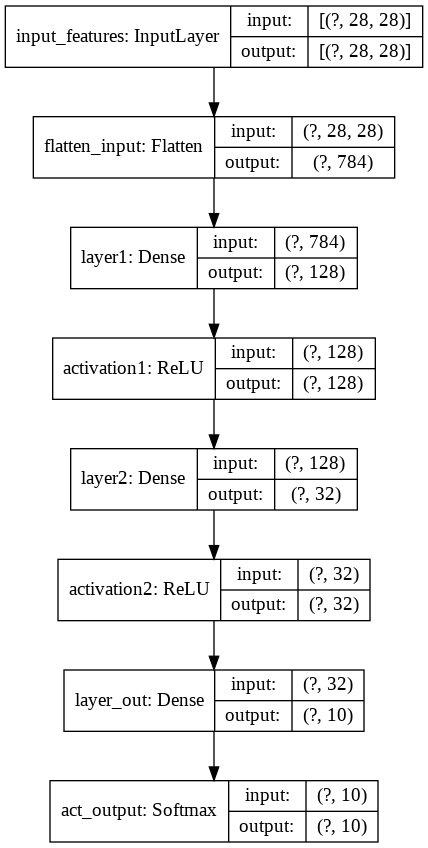

In [113]:
# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()

# モデル概要の図を描画する
f_model = model.get_static_model()
filename = 'model.png';
tf.keras.utils.plot_model(f_model, show_shapes=True, show_layer_names=True, to_file=filename)
from IPython.display import Image
Image(retina=False, filename=filename) # 図で描画
#f_model.summary()                     # テキストで出力

## ■（3）学習／最適化（オプティマイザー）

### リスト3-1　学習方法（損失関数／最適化／学習率）の定義

In [0]:
# 定数（学習方法設計時に必要となる数値）
LOSS = 'sparse_categorical_crossentropy'  # 損失関数：多クラス分類用の交差エントロピー
METRICS = ['accuracy']                    # 評価関数：正解率
OPTIMIZER = tf.keras.optimizers.Adam      # 最適化：Adam
LEARNING_RATE = 0.001                     # 学習率： 0.001（学習率の調整）

# 学習方法を定義する
model.compile(optimizer=OPTIMIZER(learning_rate=LEARNING_RATE),
              loss=LOSS,
              metrics=METRICS)            # 精度（分類では正解率。回帰では損失）

このコードのポイント：
- 損失関数には、ソフトマックス活性化関数とセットになる、交差エントロピーを指定している。
- 評価関数としては、分類の場合は来歩的に正解率（Accracy）を見る
- 最適化アルゴリズムには、最も一般的なAdamを使用した（前回までは基礎的なSGDを使っていた）
- 学習率は0.001に調整した

### リスト3-2　トレーニング（ミニバッチ学習）

In [115]:
# 定数（ミニバッチ学習時に必要となるもの）
BATCH_SIZE = 96   # バッチサイズ： 96
EPOCHS = 100      # エポック数： 100

# 早期終了
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 学習する
hist = model.fit(x=X_train,                          # 訓練用データ
                 y=y_train,                          # 訓練用ラベル
                 validation_split=0.2,               # 精度検証用の割合：20％
                 batch_size=BATCH_SIZE,              # バッチサイズ
                 epochs=EPOCHS,                      # エポック数
                 verbose=1,                          # 実行状況表示
                 callbacks=[])                       # コールバック（早期終了しない場合）
                 #callbacks=[es])                    # コールバック（早期終了する場合）

Epoch 1/50
3200/3200 [==============================] - 6s 2ms/step - loss: 1.9229 - accuracy: 0.3413 - val_loss: 1.4195 - val_accuracy: 0.3898
Epoch 2/50
3200/3200 [==============================] - 6s 2ms/step - loss: 1.3635 - accuracy: 0.4407 - val_loss: 1.4372 - val_accuracy: 0.4004
Epoch 3/50
3200/3200 [==============================] - 6s 2ms/step - loss: 1.1801 - accuracy: 0.5117 - val_loss: 1.0603 - val_accuracy: 0.5462
Epoch 4/50
3200/3200 [==============================] - 6s 2ms/step - loss: 1.0172 - accuracy: 0.5645 - val_loss: 0.9859 - val_accuracy: 0.5714
Epoch 5/50
3200/3200 [==============================] - 6s 2ms/step - loss: 0.9554 - accuracy: 0.5879 - val_loss: 0.9965 - val_accuracy: 0.5907
Epoch 6/50
3200/3200 [==============================] - 7s 2ms/step - loss: 0.9051 - accuracy: 0.6212 - val_loss: 1.0179 - val_accuracy: 0.6577
Epoch 7/50
3200/3200 [==============================] - 7s 2ms/step - loss: 0.7299 - accuracy: 0.7192 - val_loss: 0.6744 - val_accuracy:

このコードのポイント：
- 引数`validation_split`により、訓練データを訓練用と精度検証用に分割している

## ■（4）評価／精度検証

### リスト4-1　損失値／評価関数値の推移グラフ描画

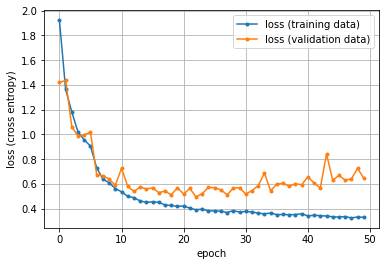

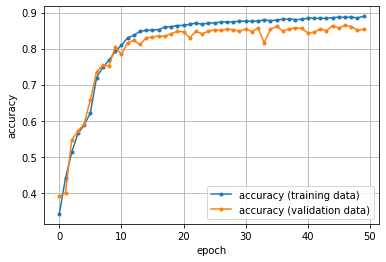

In [116]:
import matplotlib.pyplot as plt

# 学習結果（損失＝交差エントロピー）のグラフを描画
plt.figure()
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
epochs = len(train_loss)
plt.plot(range(epochs), train_loss, marker='.', label='loss (training data)')
plt.plot(range(epochs), valid_loss, marker='.', label='loss (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss (cross entropy)')

# 評価関数（正解率）のグラフを描画
plt.figure()
train_mae = hist.history['accuracy']
valid_mae = hist.history['val_accuracy']
epochs = len(train_mae)
plt.plot(range(epochs), train_mae, marker='.', label='accuracy (training data)')
plt.plot(range(epochs), valid_mae, marker='.', label='accuracy (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

実行結果のポイント：
- 訓練データでは、常に損失が下がっている
- しかし精度検証データを見ると、4エポック目あたりから逆に損失が上がってきている
- つまり、4エポック目で訓練データにフィットしすぎる「過学習」が発生している
- このような過学習を発見してハイパーパラメーターをチューニングするために、訓練データと精度検証データを分離しなければならない
  - 精度検証をテストデータで行うと、最終的な汎化性能の評価が行えなくなるため、ディープラーニングではデータは3つに分割すべきだと本連載は主張している
  - なお、重回帰分析のような統計学の場合、ハイパーパラメーターチューニングが基本的にないため、精度検証データを用意する必要は基本的にない。あくまでディープラーニングの話

## ■（5）推論／未知データによるテスト

### リスト5-1　未知データによるテスト（テストデータで評価）

In [156]:
#BATCH_SIZE = 96   # バッチサイズ（リスト3-2で定義済み）

# 未知のテストデータで学習済みモデルの汎化性能を評価
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('test socre([loss, accuracy]):', score)

# 出力例：
# 80/80 [===……===] - 0s 931us/step - loss: 0.0375 - mae: 0.1453
# test mae: 0.1452532261610031

105/105 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.8456
test socre([loss, accuracy]): [0.684512734413147, 0.8456000089645386]


### リスト5-2　推論： 写真データを仮作成

(1, 28, 28)


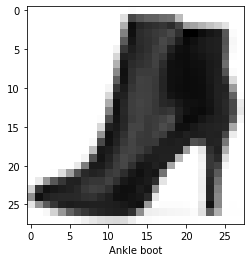

In [258]:
import matplotlib.pyplot as plt  # グラフ描画ライブラリ（データ画像の表示に使用）
#import pandas as pd # データ解析支援「pandas」

temp_data = np.array([[  # 9番：アンクルブーツ
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 31,178,162,153,151,142,138, 65,  0,  0,  0,  0,  0,  0,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 78,232,209,202,198,194,203,179, 97, 89, 73, 59, 47, 28,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,121,228,202,196,189,185,175,198,244,245,232,223,218,160,  4,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,157,223,203,199,192,176,186,215,235,228,220,216,214,164,  8,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,192,216,204,198,185,179,211,228,232,225,220,216,213,159,  6,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40,214,210,201,195,182,191,223,232,233,227,224,219,216,150,  2,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 75,224,203,197,193,182,202,229,231,233,230,228,220,217,140,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,113,228,198,188,188,187,208,229,230,234,232,230,220,215,164,  4,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,154,226,197,182,184,189,210,228,231,234,233,231,221,213,196, 35,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,190,219,193,183,184,190,210,228,232,234,233,232,223,212,211, 96,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 39,214,212,186,181,183,189,207,225,230,232,233,232,223,212,208,151,  2],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 80,227,208,185,179,183,192,205,210,222,229,229,231,225,214,204,177, 21],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,122,229,206,185,180,184,192,196,192,215,226,232,234,226,215,205,177, 24],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,169,225,208,188,180,189,187,180,170,218,235,234,224,217,212,210,160, 10],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0, 38,212,220,206,179,179,190,186,173,182,229,229,220,213,211,210,207, 84,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  0,101,229,216,197,177,188,191,180,187,219,222,214,218,216,211,212,177, 19,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0,  5,174,226,211,190,179,189,191,189,215,217,213,216,167,174,211,210,131,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0,  0, 62,221,218,203,183,179,185,198,214,214,214,214, 96,  2, 25,198,214, 79,  0,  0],
  [  0,  0,  0,  0,  0,  0,  0, 11,166,225,211,192,177,184,203,216,216,212,212, 69,  0,  0, 14,190,204, 34,  0,  0],
  [  0,  0,  0,  0,  0,  0, 22,127,219,219,206,187,178,198,223,221,212,219, 86,  0,  0,  0, 11,190,181,  9,  0,  0],
  [  0,  0,  0,  2, 33, 92,165,204,211,208,191,185,201,220,228,220,224,134,  0,  0,  0,  0, 14,198,157,  0,  0,  0],
  [  0, 21,102,160,192,212,214,199,193,193,182,199,220,226,224,219,202, 26,  0,  0,  0,  0, 16,205,137,  0,  0,  0],
  [ 44,193,227,222,217,212,205,190,183,186,198,225,230,228,218,224,111,  0,  0,  0,  0,  0, 17,209,122,  0,  0,  0],
  [109,230,213,208,205,205,204,198,196,205,215,227,229,225,221,205, 24,  0,  0,  0,  0,  0, 15,208,113,  0,  0,  0],
  [ 25,103,159,193,213,218,215,215,213,213,215,217,220,225,229, 97,  0,  3,  3,  3,  2,  0, 25,225,114,  0,  1,  0],
  [  0,  0,  7, 44,100,150,177,192,203,209,212,215,216,198,110, 17, 15, 12, 10,  9,  8,  4, 30,153, 77,  1,  1,  1],
  [  0,  0,  0,  0,  0,  0,  5, 15, 23, 31, 35, 37, 34, 17,  2,  4,  2,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0]
  ]], dtype=float)

print(temp_data.shape) # 多次元配列の形状： (1, 28, 28)

# 図を描画
plt.imshow(           # 画像を表示する
  temp_data[0],        # 1つの訓練用入力データ（28行×28列）
  cmap=plt.cm.binary) # 白黒（2値：バイナリ）の配色
plt.xlabel('Ankle boot')  # X軸のラベルに分類名を表示
plt.show()
#display(pd.DataFrame(temp_data[0])) # 表形式で表示する場合

### リスト5-3　推論： 仮データを入力した場合の予測結果値の取得

In [259]:
import matplotlib.pyplot as plt  # グラフ描画ライブラリ（データ画像の表示に使用）

# 推論（予測）する
predictions = model.predict(temp_data)

print(predictions)
# 以下のように出力される（インデックス番号「9」が99.88％）
# array([[1.50212283e-20, 1.48110773e-15, 1.04932664e-13, 2.96827862e-12,
#         6.80513210e-08, 5.95744408e-04, 1.75191891e-18, 6.33274554e-04,
#         6.95163068e-12, 9.98770893e-01]], dtype=float32)

# 数値が最大のインデックス番号を取得（＝分類を決定する）
pred_class = np.argmax(predictions)
print(pred_class) # 9 （＝Ankle boot）……などと表示される

[[0.0000000e+00 4.6553826e-32 1.3390404e-32 3.0015204e-27 5.9939032e-19
  7.2247941e-10 0.0000000e+00 1.1275127e-08 8.4482750e-27 1.0000000e+00]]
9


### リスト5-4　推論： 予測結果を棒グラフで描画

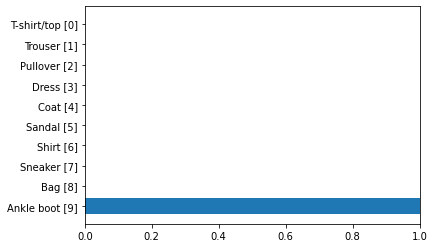

In [260]:
x = range(10)  # 9, 8, 7, ……, 0
thisplot = plt.barh(x, predictions[0])
plt.xlim([0.0, 1.0]) 
classes_name = ['T-shirt/top [0]', 'Trouser [1]', 'Pullover [2]', 
                'Dress [3]', 'Coat [4]', 'Sandal [5]', 'Shirt [6]',
                'Sneaker [7]', 'Bag [8]', 'Ankle boot [9]']
plt.yticks(x, classes_name)  # X軸のラベル
plt.gca().invert_yaxis()
plt.show()

実行結果のポイント：
- 「0.2751151」と出力され、やや青色になっている

# 【二値分類編】----------

- 上記と同様の手順から変更箇所のみ説明

## ■（6）データの準備

手書き文字の画像データセットとして「[MNIST](https://www.atmarkit.co.jp/ait/articles/2001/22/news012.html)」を使用する。  
![MNISTに含まれる画像データセットの例](https://image.itmedia.co.jp/ait/articles/2001/22/l_di-01.gif)

### リスト6-1　MNIST（手書き文字）画像データの取得

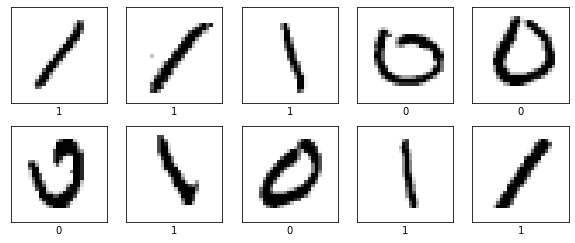

In [271]:
# TensorFlowライブラリのtensorflowパッケージを「tf」という別名でインポート
import tensorflow as tf
import matplotlib.pyplot as plt  # グラフ描画ライブラリ（データ画像の表示に使用）
import numpy as np               # 数値計算ライブラリ（データのシャッフルに使用）

# Fashion-MNISTデータ（※NumPyの多次元配列型）を取得する
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# データ分割は自動で、訓練用が6万枚、テスト用が1万枚（ホールドアウト法）。
# さらにそれぞれを「入力データ（X：行列）」と「ラベル（y：ベクトル）」に分ける

# データのフィルタリング
b = np.where(y_train < 2)[0]  # 訓練データから「0」「1」の全インデックスの取得
X_train, y_train = X_train[b], y_train[b]  # そのインデックス行を抽出（＝フィルタリング）
c = np.where(y_test < 2)[0]   # テストデータから「0」「1」の全インデックスの取得
X_test, y_test = X_test[c], y_test[c]      # そのインデックス行を抽出（＝フィルタリング）

# ※訓練データは、学習時のfit関数で訓練用と精度検証用に分割する。
# そのため、あらかじめ訓練データをシャッフルしておく
p = np.random.permutation(len(X_train))    # ランダムなインデックス順の取得
X_train, y_train = X_train[p], y_train[p]  # その順で全行を抽出する（＝シャッフル）

# ［内容確認］データのうち、最初の10枚だけを表示
classes_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10,4))  # 横：10インチ、縦：4インチの図
for i in range(10):
  plt.subplot(2,5,i+1)  # 図内にある（sub）2行5列の描画領域（plot）の何番目かを指定
  plt.xticks([])        # X軸の目盛りを表示しない
  plt.yticks([])        # y軸の目盛りを表示しない
  plt.grid(False)       # グリッド線を表示しない
  plt.imshow(           # 画像を表示する
    X_train[i],         # 1つの訓練用入力データ（28行×28列）
    cmap=plt.cm.binary) # 白黒（2値：バイナリ）の配色
  plt.xlabel(classes_name[y_train[i]])  # X軸のラベルに分類名を表示
plt.show()

このコードのポイント：
- `fashion_mnist.load_data()`を`mnist.load_data()`に変更
- MNISTデータセットは、TensorFlowでは[`tf.keras.datasets.mnist.load_data()`関数](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)で取得できる
- `np.where()`関数を使って「0」と「1」の2値のみにフィルタリングをしている（それ以外の「2」～「9」は使わない）

### リスト6-2　1つの画像データの内容確認

In [272]:
import pandas as pd # データ解析支援「pandas」

# 1件の訓練データの、ラベルと入力データを表示する
print('y_train（正解ラベル）: 「',y_train[0],'」');
print('X_train:');
display(pd.DataFrame(X_train[0])) # NumPy多次元配列をPandasデータフレームに変換して表示

y_train（正解ラベル）: 「 1 」
X_train:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,173,123,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,252,203,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,253,203,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,233,252,122,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,213,254,253,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,252,253,171,0,0,0,0,0,0,0,0


このコードのポイント：
- リスト1-2と全く同じです

### リスト6-3　入力データの正規化（Normalization）

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

このコードのポイント：
- リスト1-3と全く同じです

## ■（7）モデルの定義

以下の通りで進めていく。
- `tf.keras.Model`クラスを**サブクラス化**してモデルを定義する（**初中級者以上にお勧め**）
- tf.kerasの基本である`compile()`＆`fit()`メソッドを使用する（今回はカスタムループの実装は不要なため）


### ●ディープニューラルネットワークのモデル設計

- 入力の数（`INPUT_FEATURES`）は、**28行**×**28列**（＝784）になっているので、フラット化（Flatten）して**784個**
- 隠れ層のレイヤー数は、**2つ**
  - 隠れ層にある1つ目のニューロンの数（`LAYER1_NEURONS`）は、**128個**
  - 隠れ層にある2つ目のニューロンの数（`LAYER2_NEURONS`）は、**32個**
- 出力層にあるニューロンの数（`OUTPUT_RESULTS`）は、**1個**（0～1の数値1個で判定できるため、2クラスにする必要はない）

### リスト7-1　モデルの定義

In [0]:
import tensorflow as tf  # ライブラリ「TensorFlow」のtensorflowパッケージをインポート
from tensorflow.keras import layers    # レイヤー関連モジュールのインポート
from IPython.display import Image

# 定数（モデル定義時に必要となるもの）
INPUT_ROWS = 28         # 入力行の数： 28行
INPUT_COLS = 28         # 入力列の数： 28列
                        # 入力（特徴）の数： 784（＝28行×28列）
LAYER1_NEURONS = 128    # ニューロンの数： 128
LAYER2_NEURONS = 32     # ニューロンの数： 32
#OUTPUT_RESULTS = 10    # 前述する多クラス分類の場合： 10（＝「0」～「9」の10クラスに分類）
OUTPUT_RESULTS = 1      # 出力結果の数： 1（＝「0.0」～「1.0」の2値に分類）

# 過学習対策でドロップアウトを使う場合はコメントオフ：
#DROPOUT1_RATE = 0.2     # 第1隠れ層から第2隠れ層へのドロップ率： 0.2（20％）

# 変数（モデル定義時に必要となるもの）
activation1 = layers.ReLU(name='activation1')  # 活性化関数（隠れ層用）： ReLU関数（変更可能）
activation2 = layers.ReLU(name='activation2')  # 活性化関数（隠れ層用）： ReLU関数（変更可能）
act_output = layers.Activation('sigmoid', name='act_output') # 活性化関数（出力層用）： Sigmoid関数（固定）

# tf.keras.Modelによるモデルの定義
class NeuralNetwork(tf.keras.Model):

  # レイヤー（層）を定義
  def __init__(self):
    super(NeuralNetwork, self).__init__()

    # 入力層：入力データのフラット化（Flatten）
    self.flatten_input = layers.Flatten(    # 行列データのフラット化
      input_shape=(INPUT_ROWS, INPUT_COLS), # 入力の形状（＝入力層）※タプル形式
      name='flatten_input')
 
    # 隠れ層：1つ目のレイヤー（layer）
    self.layer1 = layers.Dense(       # 全結合層（線形変換）
      # 入力ユニット数は、前の出力ユニット数が使われるので、指定不要
      LAYER1_NEURONS,                 # 次のレイヤーへの出力ユニット数
      name='layer1')

    # 第1レイヤーの後でドロップアウトを使う場合はコメントオフ：
    #self.dropput1 = layers.Dropout(  # ドロップアウト
    #  DROPOUT1_RATE,                 # 何％ドロップするか
    #  name='dropput1')
    
    # 隠れ層：2つ目のレイヤー（layer）
    self.layer2 = layers.Dense(       # 全結合層
      LAYER2_NEURONS,                 # 次のレイヤーへの出力ユニット数
      name='layer2')

    # 出力層
    self.layer_out = layers.Dense(    # 全結合層
      OUTPUT_RESULTS,                 # 出力結果への出力ユニット数
      name='layer_out')

  # フォワードパスを定義
  def call(self, x, train_mode=True):
    x = self.flatten_input(x)         # 入力データのフラット化

    # 「出力＝活性化関数（第n層（入力））」の形式で記述
    x = activation1(self.layer1(x))   # 活性化関数は変数として定義

    #ドロップアウトを使う場合はコメントオフ：
    #if train_mode:                   # 訓練時のみ……
    #  x = self.dropput2(x)           # ……ドロップアウト（不活性化）

    x = activation2(self.layer2(x))   # 活性化関数は変数として定義

    x = act_output(self.layer_out(x)) # ※活性化関数は「softmax」固定
    return x

  # モデル内容の出力を行う独自メソッド
  def get_static_model(self):
    x = layers.Input(shape=(28,28), name='input_features')
    static_model = tf.keras.Model(inputs=[x], outputs=self.call(x)) 
    return static_model

このコードのポイント：
- 出力層のニューロン数が10個から1個に変わりました
- 出力層の活性化関数は、二値分類時に一般的な[シグモイド関数](https://www.atmarkit.co.jp/ait/articles/2003/04/news021.html)を指定している（※先ほどの多クラス分類ではソフトマックス関数だった）。セットで、損失関数には二値分類用の交差エントロピーを使う（後述）


### リスト7-2　モデル内容（図）の確認

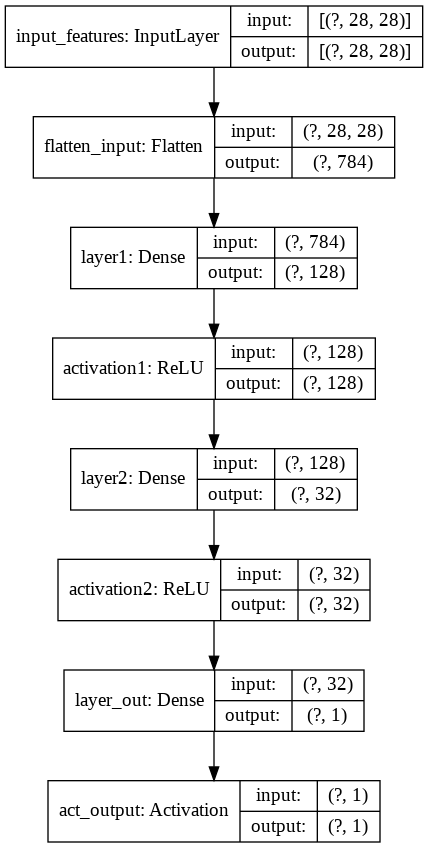

In [278]:
# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()

# モデル概要の図を描画する
f_model = model.get_static_model()
filename = 'model.png';
tf.keras.utils.plot_model(f_model, show_shapes=True, show_layer_names=True, to_file=filename)
from IPython.display import Image
Image(retina=False, filename=filename) # 図で描画
#f_model.summary()                     # テキストで出力

## ■（8）学習／最適化（オプティマイザー）

### リスト8-1　学習方法（損失関数／最適化／学習率）の定義

In [0]:
# 定数（学習方法設計時に必要となる数値）
LOSS = 'binary_crossentropy'  # 損失関数：多クラス分類用の交差エントロピー
METRICS = ['accuracy']                    # 評価関数：正解率
OPTIMIZER = tf.keras.optimizers.Adam      # 最適化：Adam
LEARNING_RATE = 0.001                     # 学習率： 0.001（学習率の調整）

# 学習方法を定義する
model.compile(optimizer=OPTIMIZER(learning_rate=LEARNING_RATE),
              loss=LOSS,
              metrics=METRICS)            # 精度（分類では正解率。回帰では損失）

このコードのポイント：
- 損失関数には、シグモイド活性化関数とセットになる、二値用の交差エントロピー（binary_crossentropy）を指定している
  - 多クラス分類用は（sparse_categorical_crossentropyもしくはcategorical_crossentropy）だった

### リスト8-2　トレーニング（ミニバッチ学習）

In [280]:
# 定数（ミニバッチ学習時に必要となるもの）
BATCH_SIZE = 96   # バッチサイズ： 96
EPOCHS = 100      # エポック数： 100

# 早期終了
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 学習する
hist = model.fit(x=X_train,                          # 訓練用データ
                 y=y_train,                          # 訓練用ラベル
                 validation_split=0.2,               # 精度検証用の割合：20％
                 batch_size=BATCH_SIZE,              # バッチサイズ
                 epochs=EPOCHS,                      # エポック数
                 verbose=1,                          # 実行状況表示
                 callbacks=[])                       # コールバック（早期終了しない場合）
                 #callbacks=[es])                    # コールバック（早期終了する場合）

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

106/106 [==============================] - 1s 5ms/step - loss: 0.0445 - accuracy: 0.9840 - val_loss: 0.0053 - val_accuracy: 0.9984
Epoch 2/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9984
Epoch 3/100
106/106 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 4/100
106/106 [==============================] - 0s 4ms/step - loss: 7.85

このコードのポイント：
- リスト3-2と全く同じです

## ■（9）評価／精度検証

### リスト9-1　損失値／評価関数値の推移グラフ描画

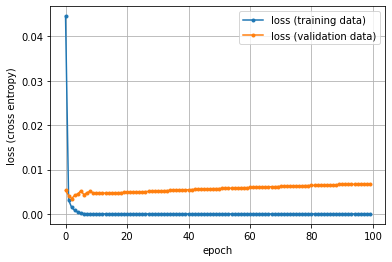

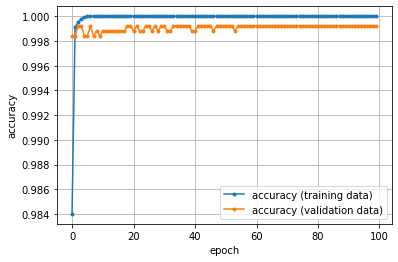

In [281]:
import matplotlib.pyplot as plt

# 学習結果（損失＝交差エントロピー）のグラフを描画
plt.figure()
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
epochs = len(train_loss)
plt.plot(range(epochs), train_loss, marker='.', label='loss (training data)')
plt.plot(range(epochs), valid_loss, marker='.', label='loss (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss (cross entropy)')

# 評価関数（正解率）のグラフを描画
plt.figure()
train_mae = hist.history['accuracy']
valid_mae = hist.history['val_accuracy']
epochs = len(train_mae)
plt.plot(range(epochs), train_mae, marker='.', label='accuracy (training data)')
plt.plot(range(epochs), valid_mae, marker='.', label='accuracy (validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

このコードのポイント：
- リスト4-1と全く同じです
- かなり早い段階で過学習となっている

## ■（10）推論／未知データによるテスト

### リスト10-1　未知データによるテスト（テストデータで評価）

In [282]:
#BATCH_SIZE = 96   # バッチサイズ（リスト3-2で定義済み）

# 未知のテストデータで学習済みモデルの汎化性能を評価
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('test socre([loss, accuracy]):', score)

# 出力例：
# 23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9995
# test socre([loss, accuracy]): [0.002963468199595809, 0.9995272159576416]

23/23 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9995
test socre([loss, accuracy]): [0.002963468199595809, 0.9995272159576416]


このコードのポイント：
- リスト5-1と全く同じです

### リスト10-2　推論： 手書き文字データを自作








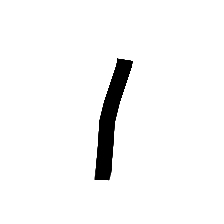
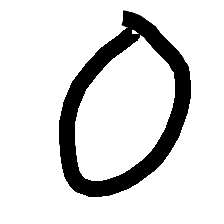
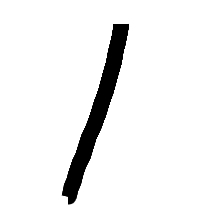
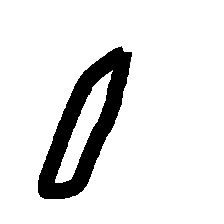
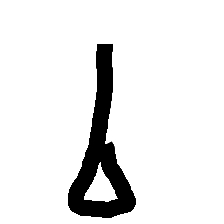
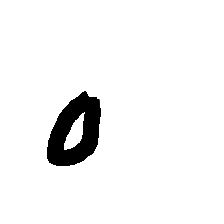

In [398]:
#@title 「0」か「1」を手書きしてください。
# This code will be hidden when the notebook is loaded.

from IPython.core.display import HTML
from IPython.display import Image
from PIL import Image
from io import BytesIO
import base64
import numpy as np
import matplotlib.pyplot as plt
import google.colab.output

temp_data = np.zeros((1, 28, 28))

def Base64image(encoded):
  print(encoded)
  binary = base64.b64decode(encoded.split(',')[1])
  im224 = Image.open(BytesIO(binary))
  im28 = im224.resize(
      (28, 28),
      Image.BICUBIC).convert('L') # L＝ 8ビット白黒
  global temp_data
  temp_data = np.array(im28).reshape((1, 28, 28)) # 多次元配列の形状
  for i in range(28):
    for j in range(28):
      temp_data[0, i, j] = 255 - temp_data[0, i, j] #「白＝0」～「黒＝1」に変換
  
google.colab.output.register_callback('Base64image', Base64image)

HTML('''
<canvas id="myCanvas" width="224" height="224" style="border:1px solid #d3d3d3;">
お使いのブラウザーではHTML canvasをサポートしていないようです。
</canvas>
<p>
  <button id="clear">削除</button>
  <button id="submit">このデータを保存</button>
  <span id="infobar"></span>
</p>
<script>

// Colabノートブックのカーネルオブジェクト
//var kernel = IPython.notebook.kernel;

// Canvas描画領域
var canvas = document.getElementById("myCanvas");
var ctx = canvas.getContext("2d");
ctx.strokeStyle = "#000";
ctx.lineJoin = "round";
ctx.lineWidth = 15;
ctx.fillStyle = "#FFF";
ctx.fillRect(0, 0, canvas.width, canvas.height);

// メッセージ表示領域
var infobar = document.getElementById("infobar");

// ［削除］ボタン
var clearbtn = document.getElementById("clear");
clearbtn.addEventListener("click", function(){
  ctx.clearRect(0, 0, canvas.width, canvas.height);
  ctx.fillStyle = "#FFF";
  ctx.fillRect(0, 0, canvas.width, canvas.height);
  infobar.textContent = "";
});

// ［このデータを保存］ボタン
var submitbtn = document.getElementById("submit");
submitbtn.addEventListener("click", function(){
  var base64image = canvas.toDataURL('image/jpeg', 1.0);
  google.colab.kernel.invokeFunction('Base64image', [base64image])
  infobar.textContent = "保存しました！";
});

// マウスカーソルを管理
var mouse = {x: 0, y: 0};

// マウスカーソルを描画する
var onPaint = function() {
  ctx.lineTo(mouse.x, mouse.y);
  ctx.stroke();
};

// マウスの移動を捕捉する
canvas.addEventListener('mousemove', function(e) {
  var rect = e.target.getBoundingClientRect();
  mouse.x = e.clientX - rect.left - 1;
  mouse.y = e.clientY - rect.top - 1;
}, false);


// マウスボタンが押し下げられたら描画を開始させる
canvas.addEventListener('mousedown', function(e) {
  ctx.moveTo(mouse.x, mouse.y);
  ctx.beginPath();
  canvas.addEventListener('mousemove', onPaint, false);
}, false);

// マウスボタンが離されたら描画を終了させる
canvas.addEventListener('mouseup', function() {
  canvas.removeEventListener('mousemove', onPaint, false);
}, false);

</script>
''')

(1, 28, 28)


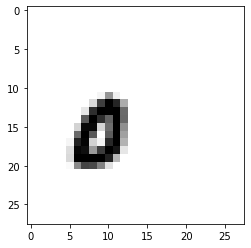

In [409]:
import matplotlib.pyplot as plt  # グラフ描画ライブラリ（データ画像の表示に使用）
#import pandas as pd # データ解析支援「pandas」

print(temp_data.shape) # 多次元配列の形状： (1, 28, 28)

# 図を描画
plt.imshow(           # 画像を表示する
  temp_data[0],        # 1つの訓練用入力データ（28行×28列）
  cmap=plt.cm.binary) # 白黒（2値：バイナリ）の配色
plt.show()
#display(pd.DataFrame(temp_data[0])) # 表形式で表示する場合

### リスト10-3　推論： 仮データを入力した場合の予測結果値の取得

In [410]:
import matplotlib.pyplot as plt  # グラフ描画ライブラリ（データ画像の表示に使用）

# 推論（予測）する
predictions = model.predict(temp_data)

predictions
# 以下のように出力される（「1.」は100％「1」、「0.」なら100％「0」）
# array([[1.]], dtype=float32)

array([[0.]], dtype=float32)

# お疲れさまでした。第8回は修了です。